In this assignment you need to collect data related to stock
market from Twitter for one week. In Twitter, ticker symbols like #gold are used
for stocks and companies. You are requested to collect the tweets with some
specific keywords and store them in different files. The following keywords should
be used:

In [ ]:
# User credential to access tweeter API
CONSUMER_API_KEY = 'Your Key Here'
CONSUMER_API_SECRET = 'Your Key Here'
BEARER_TOKEN = 'Your Key Here'
ACCESS_TOKEN = 'Your Key Here'
ACCESS_TOKEN_SECRET = 'Your Key Here'

In [ ]:
# Libraries imported
import tweepy as tw
import pandas as pd
import string
import csv
from datetime import datetime, timedelta

pd.set_option('display.max_colwidth', 100)

In [ ]:
# create an authentication object
auth = tw.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)

# Setting your access token and secret
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

# Create the API object passing the auth object
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# List Created of search words and date(s)
search_words = ["#Bitcoin","#Gold","#Altcoin","#Coindesk","#Cryptocurrency","#APPL","#GOOG","#YHOO"]
since_date = ["2021-02-28","2021-03-01","2021-03-02","2021-03-03","2021-03-04","2021-03-05","2021-03-06"]

In [ ]:
# For loop to add the headers in all the csv files:
for words in search_words:
    with open(str(words)+'.csv','a') as file:
        writer = csv.writer(file)
        writer.writerow(('tweet_id', 'tweet_time', 'user_id', 'tweet_text'))

# Collection of Data

In [ ]:
# For loop(s) to insert data into csv file
tweet_list = []
for date in since_date:
    tweet_list.clear()
    u_date = datetime.strptime(date, "%Y-%m-%d")
    until_date = datetime.strftime((u_date + timedelta(days=1)), "%Y-%m-%d")
    
    for word in search_words:
        tweets = tw.Cursor(api.search, q=word, lang='en', since=date, until=until_date).items(100)
        tweet_list = []
        
        for tweet in tweets:
            tweet_list.append((tweet.id, tweet.created_at, tweet.user.id, tweet.text))
            df = pd.DataFrame(tweet_list, columns=['tweet_id', 'tweet_time', 'user_id', 'tweet_text'])
            
        df.to_csv(str(word)+'.csv', mode='a', header=False, index=False)

In [ ]:
# To see the data from the files

for word in search_words:
    with open(str(word)+'.csv', 'r', encoding="utf8") as file:
        reader = csv.reader(file)
        for row in reader:
            print(row)

['tweet_id', 'tweet_time', 'user_id', 'tweet_text']
[]
['1366176342295810051', '2021-02-28 23:59:56', '1014666657686409216', '@TheAustin24 @cameron @tyler If your invested in #bitcoin\xa0 for the long term think “glass half full” not “glass hal… https://t.co/nNIwZeZK5v']
['1366176336922828802', '2021-02-28 23:59:55', '282715849', '2015\n1 #Bitcoin = $350\n1 Pair of Google Glass= $1500 + tax \nNot all tech makes it.']
['1366176330946129927', '2021-02-28 23:59:54', '1365305906913808384', 'RT @2210ft: 1/n #Bitcoin price predictions based on my proprietary Bubble Lines indicate upside of 3-8x. The Indicator is based on the diff…']
['1366176328559517698', '2021-02-28 23:59:53', '2957502363', '@Erikcason The best insurance against #Bitcoin’s success is buying and holding Bitcoin. Few.']
['1366176321353768963', '2021-02-28 23:59:51', '1363275759171821568', 'RT @GoingParabolic: #Bitcoin is dead. Or is it? https://t.co/hsgSqNLdvQ']
['1366176317344010246', '2021-02-28 23:59:51', '134841050938152

['1366522999252385804', '2021-03-01 22:57:26', '3365033775', "Take the @CoinSpectre Intro to security course! It's free starter course that teaches the basics of security!\n\n🔸… https://t.co/wOImvzIB8g"]
['1366522709971267591', '2021-03-01 22:56:17', '935979532405833728', 'RT @askconradzen: Rather than lose your small staked #hex end with low gas fee like right now and then restake for longer ie more than 4 ye…']
['1366522494115487744', '2021-03-01 22:55:26', '30132128', 'Rather than lose your small staked #hex end with low gas fee like right now and then restake for longer ie more tha… https://t.co/L0O19X7R2h']
['1366522185498595328', '2021-03-01 22:54:12', '1355780973724487683', '@MiniMe2Too @BitMartExchange @reddcoinnews @reddcoin #reddcoin 100% Big Long Term Gains Inbound💰💰🚀🚀🚀 #rdd #altcoin… https://t.co/DBREYq2xHY']
['1366522095824371716', '2021-03-01 22:53:51', '1084845673', 'RT @CryptoBTC_Chris: Thanks for 70k Subs!\n\nBOOM! Check me out on YouTube for DAILY #Crypto Market updat

['1366900137042186240', '2021-03-02 23:56:03', '721424072', 'So I have finished the last cig from the last pack I bought... https://t.co/XiR182RyN1 #CryptoCurrency (from Reddit)']
['1366900086572130304', '2021-03-02 23:55:51', '1202983366099755008', 'RT @EdufexOfficial: Learning scope is very vast with Edufex and it gives you an opportunity to explore the new options. \nLogin on the https…']
['1366900031299612674', '2021-03-02 23:55:37', '1019514600906080256', 'RT @EdufexOfficial: Learning scope is very vast with Edufex and it gives you an opportunity to explore the new options. \nLogin on the https…']
['1366900028443418624', '2021-03-02 23:55:37', '3131100022', 'RT @latokens: LATOKEN @giftedhandsGHD Giveaway! \n\n4 lucky winners to get 50K $GHD each. Participant with most invites gets assured 50K $GHD…']
['1366900027478528001', '2021-03-02 23:55:36', '1362716105798684675', 'RT @EdufexOfficial: Learning scope is very vast with Edufex and it gives you an opportunity to explore the new o

In [ ]:
# Dynamically create dataframes
dfs = []
for (i,word) in zip(range(len(search_words)), search_words):
    df_name = 'df_'+str(i)
    dfs.append(df_name)
#     print(dfs)
    dfs[i] = pd.read_csv(str(word)+'.csv',sep=',')

In [ ]:
# To see the generated data from the dataframes
dfs

[                tweet_id           tweet_time              user_id  \
 0    1366176342295810051  2021-02-28 23:59:56  1014666657686409216   
 1    1366176336922828802  2021-02-28 23:59:55            282715849   
 2    1366176330946129927  2021-02-28 23:59:54  1365305906913808384   
 3    1366176328559517698  2021-02-28 23:59:53           2957502363   
 4    1366176321353768963  2021-02-28 23:59:51  1363275759171821568   
 ..                   ...                  ...                  ...   
 695  1368349986535079938  2021-03-06 23:57:14  1298432020863840257   
 696  1368349979576659968  2021-03-06 23:57:12           1353945055   
 697  1368349976556933120  2021-03-06 23:57:11  1361420927133753347   
 698  1368349971418906627  2021-03-06 23:57:10   890181746985140225   
 699  1368349969200119815  2021-03-06 23:57:10   992056970625605637   
 
                                                                                               tweet_text  
 0    @TheAustin24 @cameron @tyler If 

# Data Cleaning and Processing

In [ ]:
import string
import re
# Remove puntuation marks Function
def remove_punctuation(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text
# Remove words less than two words Function
def remove_words(text):
    tokens = re.split('\W+',text)
    rm_words = [i for i in tokens if len(i) > 2]
    return rm_words

In [ ]:
# To remove the duplilcates from the file
for (i,word) in zip(range(len(dfs)), search_words):
#     Drop Duplicates
    drop_data = dfs[i].drop_duplicates(inplace=True)
    print("Duplicate Data in",str(word),"file:",drop_data)
#     Remove Retweets
    dfs[i] = dfs[i][~dfs[i].tweet_text.str.contains("RT")]
    dfs[i] = dfs[i].reset_index(drop=True)
    print("Shape of",str(word),"file:",dfs[i].shape)
#     Remove puntuation marks
    dfs[i]['process_text'] = dfs[i]['tweet_text'].apply(lambda x: remove_punctuation(x))
#     Remove Numbers from the Text
    dfs[i].process_text = dfs[i].process_text.str.replace('\d+', '')
#     Remove words less than length 2
    dfs[i]['process_text_token'] = dfs[i]['process_text'].apply(lambda x: remove_words(x.lower()))
    print(dfs[i].head())
    print("\n")

Duplicate Data in #Bitcoin file: None
Shape of #Bitcoin file: (239, 4)
              tweet_id           tweet_time              user_id  \
0  1366176342295810051  2021-02-28 23:59:56  1014666657686409216   
1  1366176336922828802  2021-02-28 23:59:55            282715849   
2  1366176328559517698  2021-02-28 23:59:53           2957502363   
3  1366176312524566529  2021-02-28 23:59:49           2577886615   
4  1366176276428582917  2021-02-28 23:59:41           1520924106   

                                                                                            tweet_text  \
0  @TheAustin24 @cameron @tyler If your invested in #bitcoin  for the long term think “glass half f...   
1                2015\n1 #Bitcoin = $350\n1 Pair of Google Glass= $1500 + tax \nNot all tech makes it.   
2         @Erikcason The best insurance against #Bitcoin’s success is buying and holding Bitcoin. Few.   
3  Whats happened in #Bitcoin since the #Tesla pump? \n\nWatch this week's recap to find out. ht

Duplicate Data in #YHOO file: None
Shape of #YHOO file: (87, 4)
              tweet_id           tweet_time              user_id  \
0  1366106840828887042  2021-02-28 19:23:46   893305069059403776   
1  1366099292067364869  2021-02-28 18:53:46   893305069059403776   
2  1366086908443463681  2021-02-28 18:04:34  1242526873189404672   
3  1366056748847558657  2021-02-28 16:04:43             14858262   
4  1366001144573607938  2021-02-28 12:23:46   893305069059403776   

                                                                                            tweet_text  \
0  Google is the internet !! #google #googl #goog #stock #market #tech #technology #epic #internet ...   
1  Google...What Can I Say !! #google #googl #stock #tech #internet #goog #technology #epic #monste...   
2  Hello \nHow are you?\n🥇BIG OFFER🥇\n\n👉Today you can order any work for youtube or Facebook ads o...   
3  Lot of talk @karaswisher and @profgalloway “everyone” moving to TX and FLA. You forget WA? No in... 

In [ ]:
dfs[1]

,tweet_id,tweet_time,user_id,tweet_text,process_text,process_text_token
0,1366175436951093249,2021-02-28 23:56:21,1321443160170459144,News report) were now in gold :) #gold #ApexLegends #apexlegendsclips #gaming,News report were now in gold gold ApexLegends apexlegendsclips gaming,"[news, report, were, now, gold, gold, apexlegends, apexlegendsclips, gaming]"
1,1366175270542188546,2021-02-28 23:55:41,910614773611548672,#Mib #BorsaMilano #FTSEMIB #PiazzaAffari #SPX #spx500 #WallStreet #spxindex #sp500 #borsa #nyse ...,Mib BorsaMilano FTSEMIB PiazzaAffari SPX spx WallStreet spxindex sp borsa nyse elliottwave gold…...,"[mib, borsamilano, ftsemib, piazzaaffari, spx, spx, wallstreet, spxindex, borsa, nyse, elliottwa..."
2,1366175246143922177,2021-02-28 23:55:35,1271684554915344384,EURNZD TP2 Hit! 180 PIPS PROFIT 🔥👍🏻⚡️\n\nGo and checkout the link in the bio to get amazing sign...,EURNZD TP Hit PIPS PROFIT 🔥👍🏻⚡️\n\nGo and checkout the link in the bio to get amazing signals\n...,"[eurnzd, hit, pips, profit, and, checkout, the, link, the, bio, get, amazing, signals, crudeoil,..."
3,1366174835974504451,2021-02-28 23:53:57,890146412,My article on Sassy Resources on seekingalpha https://t.co/f80F0eioeQ $SASY.C $SSYRF #Newfoundla...,My article on Sassy Resources on seekingalpha httpstcofFeioeQ SASYC SSYRF Newfoundland GOLD sass...,"[article, sassy, resources, seekingalpha, httpstcoffeioeq, sasyc, ssyrf, newfoundland, gold, sas..."
4,1366174716482961409,2021-02-28 23:53:29,1332103195875799040,Undefeated cookie-eating contest champion!\n\nFollow cat Muki for more adventures!\n#cat #Muki #...,Undefeated cookieeating contest champion\n\nFollow cat Muki for more adventures\ncat Muki comic ...,"[undefeated, cookieeating, contest, champion, follow, cat, muki, for, more, adventures, cat, muk..."
...,...,...,...,...,...,...
340,1368336410176933889,2021-03-06 23:03:17,557344637,Annabel reaction moment to Van Onselen. #gold #insiders its not about @vanonslenmp do grow up,Annabel reaction moment to Van Onselen gold insiders its not about vanonslenmp do grow up,"[annabel, reaction, moment, van, onselen, gold, insiders, its, not, about, vanonslenmp, grow]"
341,1368336314182074369,2021-03-06 23:02:54,1051161167379468288,@jsblokland @TaviCosta I don’t know why the guy called “sell #stocks buy #gold” blocked me 🤷🏻‍♂️,jsblokland TaviCosta I don’t know why the guy called “sell stocks buy gold” blocked me 🤷🏻‍♂️,"[jsblokland, tavicosta, don, know, why, the, guy, called, sell, stocks, buy, gold, blocked]"
342,1368336043745763332,2021-03-06 23:01:49,2249523421,GOLD - The Mother of All Opportunities As Central Banks Walk The Line #Gold #CentralBanks https:...,GOLD The Mother of All Opportunities As Central Banks Walk The Line Gold CentralBanks httpstcoz...,"[gold, the, mother, all, opportunities, central, banks, walk, the, line, gold, centralbanks, htt..."
343,1368335948514201605,2021-03-06 23:01:27,1308508136995721218,"@menlobear 4) Go #gold, #silver, and #BTC and wait for the crash, then by everything.",menlobear Go gold silver and BTC and wait for the crash then by everything,"[menlobear, gold, silver, and, btc, and, wait, for, the, crash, then, everything]"


# Data Visualization

In [ ]:
# Import Required libraries for data visualization
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(5,5)})

Data Visualization for daily number of tweets for each keyword

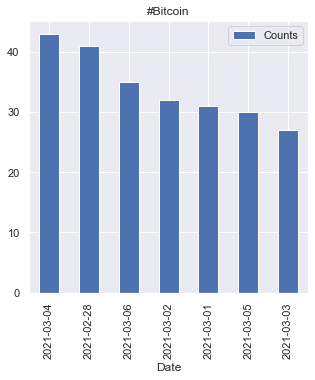

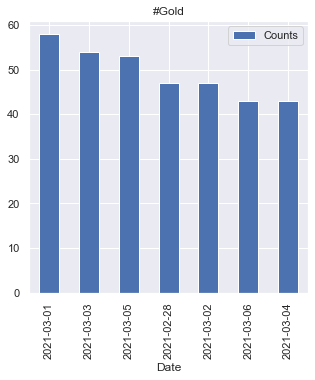

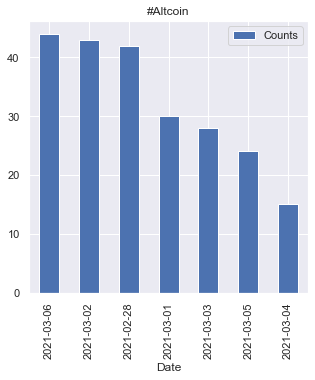

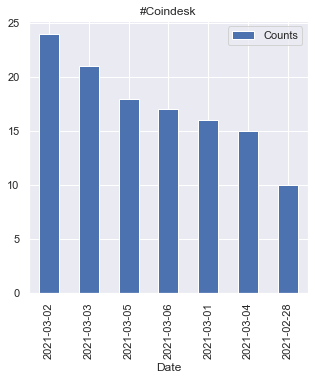

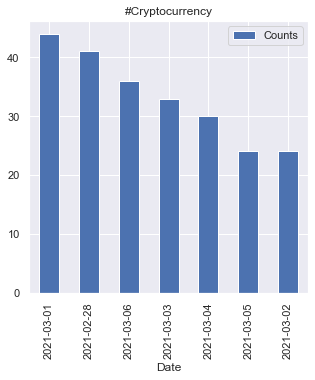

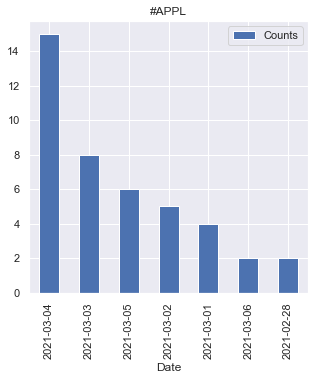

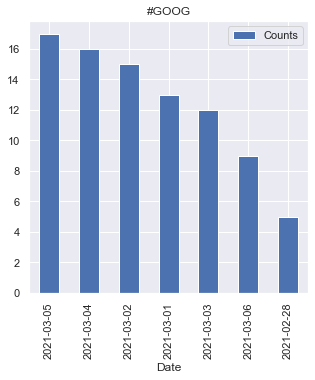

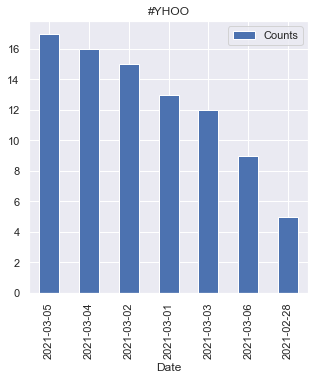

In [ ]:
from datetime import date
from datetime import datetime
d_count = 0
for (i,word) in zip(range(len(dfs)), search_words):
#     print(word ,search_words[i])
    if str(word) == str(search_words[i]):
        dfs[i]['time_chng'] = pd.to_datetime(dfs[i]['tweet_time'], errors='coerce', format='%Y/%m/%d').dt.date
        value_counts = dfs[i]['time_chng'].value_counts(sort=True)
        df_val_counts = pd.DataFrame(value_counts)
        df_value_counts_reset = df_val_counts.reset_index()
        df_value_counts_reset.columns = ['Date', 'Counts']
        df_value_counts_reset.plot(x='Date',y='Counts',kind="bar",title=word)

Data Visualization for daily numbe of users for each keywords

In [ ]:
# Data Visualization for daily numbe of users for each keywords
user_list = []
count_user = pd.DataFrame(columns=["Hashtag","Date","Counts"]) 
count=0
for (i,word) in zip(range(len(dfs)), search_words):
    if word == search_words[i]:
        dfs[i]['time_chng'] = pd.to_datetime(dfs[i]['tweet_time'], errors='coerce', format='%Y/%m/%d').dt.date
#         print(dfs[i]['time_chng'])
        for j,k in zip((dfs[i]['time_chng']),dfs[i]['user_id']):
            if str(j) == "2021-02-28":
                user_list.append(k)
                count+=1
                count_user = count_user.append({'Hashtag':word,'Date':j,"Counts":count}, ignore_index=True)
            elif str(j) == "2021-03-01":
                user_list.append(k)
                count+=1
                count_user = count_user.append({'Hashtag':word,'Date':j,"Counts":count}, ignore_index=True)
            elif str(j) == "2021-03-02":
                user_list.append(k)
                count+=1
                count_user = count_user.append({'Hashtag':word,'Date':j,"Counts":count}, ignore_index=True)
            elif str(j) == "2021-03-03":
                user_list.append(k)
                count+=1
                count_user = count_user.append({'Hashtag':word,'Date':j,"Counts":count}, ignore_index=True)
            elif str(j) == "2021-03-04":
                user_list.append(k)
                count+=1
                count_user = count_user.append({'Hashtag':word,'Date':j,"Counts":count}, ignore_index=True)
            elif str(j) == "2021-03-05":
                user_list.append(k)
                count+=1
                count_user = count_user.append({'Hashtag':word,'Date':j,"Counts":count}, ignore_index=True)
            elif str(j) == "2021-03-06":
                user_list.append(k)
                count+=1
                count_user = count_user.append({'Hashtag':word,'Date':j,"Counts":count}, ignore_index=True)
        count=0
# count_user

In [ ]:
value_counts = count_user.groupby(['Hashtag', 'Date']).size()  
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['Hashtags', 'Date','Counts']
# print(df_value_counts_reset)

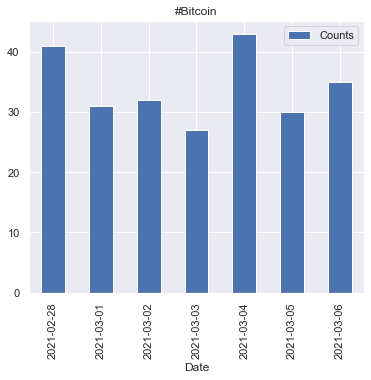

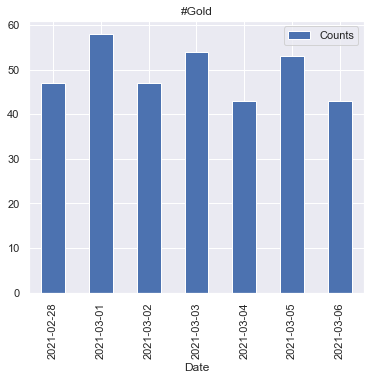

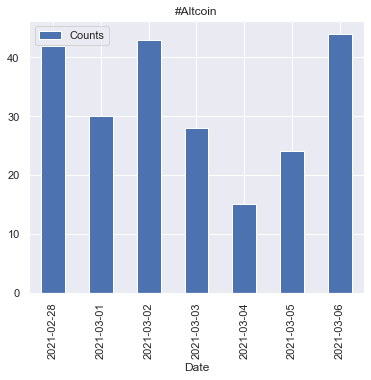

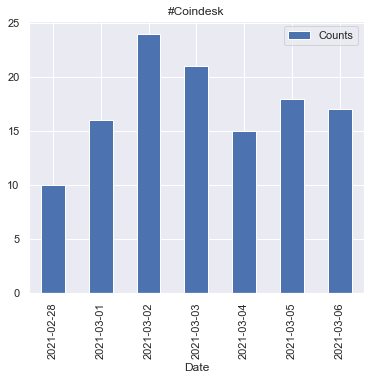

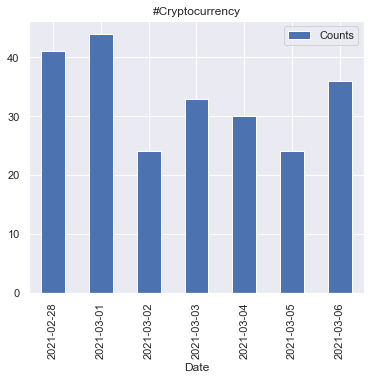

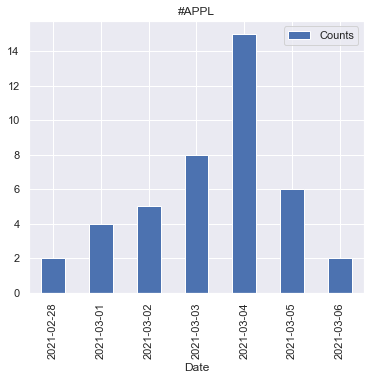

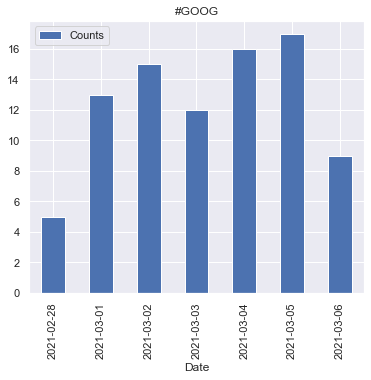

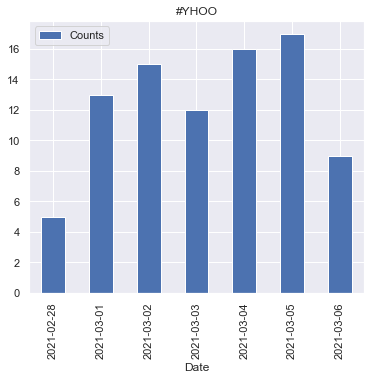

In [ ]:
# Representation
sns.set(rc={'figure.figsize':(6,5)})
for i,words in zip(range(len(search_words)),search_words):
    ddf = df_value_counts_reset[df_value_counts_reset['Hashtags'] == words]
    ddf.plot('Date','Counts',kind='bar',title=words)
    del ddf